In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Función que computa el método de Runge Kutta de cuarto orden 
#para un sistema de 4 ecuaciones con 5 variables (x,y,z,r,t)

def runge_kutta_sis(dx,dy,dz,dr,x0,y0,z0,r0,a,b,h):
    t = np.arange(a,b+h,h) 
    nt = len(t) 
    x = np.zeros(nt); y = np.zeros(nt); z = np.zeros(nt); r = np.zeros(nt); dx1 = np.zeros(nt)
    x[0] = x0; y[0] = y0; z[0] = z0; r[0] = r0; dx1[0]=x0
    
    for i in range(nt-1): 
        k1 = h * dx(x[i],y[i],z[i],r[i],dx1[i],t[i])
        l1 = h * dy(x[i],y[i],z[i],r[i],dx1[i],t[i])
        m1 = h * dz(x[i],y[i],z[i],r[i],dx1[i],t[i])
        n1 = h * dr(x[i],y[i],z[i],r[i],dx1[i],t[i])
        
        k2 = h * dx(x[i]+k1/2,y[i]+l1/2,z[i]+m1/2,r[i]+n1/2,dx1[i]+k1/2,t[i]+h/2)
        l2 = h * dy(x[i]+k1/2,y[i]+l1/2,z[i]+m1/2,r[i]+n1/2,dx1[i]+k1/2,t[i]+h/2)
        m2 = h * dz(x[i]+k1/2,y[i]+l1/2,z[i]+m1/2,r[i]+n1/2,dx1[i]+k1/2,t[i]+h/2)
        n2 = h * dr(x[i]+k1/2,y[i]+l1/2,z[i]+m1/2,r[i]+n1/2,dx1[i]+k1/2,t[i]+h/2)
        
        k3 = h * dx(x[i]+k2/2,y[i]+l2/2,z[i]+m2/2,r[i]+n2/2,dx1[i]+k2/2,t[i]+h/2)
        l3 = h * dy(x[i]+k2/2,y[i]+l2/2,z[i]+m2/2,r[i]+n2/2,dx1[i]+k2/2,t[i]+h/2)
        m3 = h * dz(x[i]+k2/2,y[i]+l2/2,z[i]+m2/2,r[i]+n2/2,dx1[i]+k2/2,t[i]+h/2)
        n3 = h * dr(x[i]+k2/2,y[i]+l2/2,z[i]+m2/2,r[i]+n2/2,dx1[i]+k2/2,t[i]+h/2)
        
        k4 = h * dx(x[i]+k3,y[i]+l3,z[i]+m3,r[i]+n3,dx1[i]+k3/2,t[i]+h)
        l4 = h * dy(x[i]+k3,y[i]+l3,z[i]+m3,r[i]+n3,dx1[i]+k3/2,t[i]+h)
        m4 = h * dz(x[i]+k3,y[i]+l3,z[i]+m3,r[i]+n3,dx1[i]+k3/2,t[i]+h)
        n4 = h * dr(x[i]+k3,y[i]+l3,z[i]+m3,r[i]+n3,dx1[i]+k3/2,t[i]+h)
        
        x[i+1] = x[i]+(1/6)*(k1+2*k2+2*k3+2*k4)
        y[i+1] = y[i]+(1/6)*(l1+2*l2+2*l3+2*l4)
        z[i+1] = z[i]+(1/6)*(m1+2*m2+2*m3+2*m4)
        r[i+1] = r[i]+(1/6)*(n1+2*n2+2*n3+2*n4)
    
    #plt.figure(); plt.plot(t,x); plt.title('Células gliales')
    #plt.figure(); plt.plot(t,y); plt.title('Células glioma') 
    #plt.figure(); plt.plot(t,z); plt.title('Neuronas'); 
    #plt.figure(); plt.plot(t,r); plt.title('Agente terapéutico'); plt.show()
    
    return t,x,y,z,r 

In [3]:
a = 0    #tiempo inicial
b = 500  #tiempo final
h = 0.001 #paso

x0 = 0.99 #concentración inicial de células gliales 
y0 = 0.01 #concentración inicial de células cancerosas
z0 = 0.99 #concentración inicial de neuronas
r0 = 0    #concentración inicial de agente terapéutico

# SIN Agente Terapéutico

In [4]:
omega1 = 0.0068 #Velocidad de proliferación células gliales
beta1 = 0.018
omega2 = 0.012 #Velocidad de proliferación células cancerosas
beta2 = 0.0018 
alpha = 5

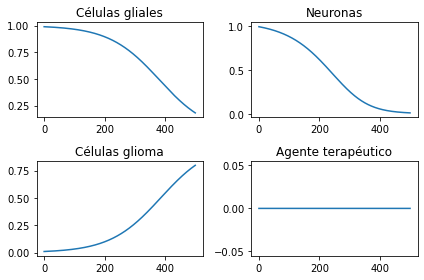

In [5]:
# g(t) concentracion de células gliales -> g
# c(t) concentracion de células cancerosas (glioma) -> c
# n(t) concentracion de neuronas -> n 
# q(t) concentracion de agente terapéutico -> q

dg = lambda x,y,z,r,dx,t: omega1*x*(1-x)-beta1*x*y
dc = lambda x,y,z,r,dx,t: omega2*y*(1-y)-beta2*x*y
dn = lambda x,y,z,r,dx,t: alpha*(omega1*x*(1-x)-beta1*x*y)*np.heaviside(-(omega1*x*(1-x)-beta1*x*y),1/2)*z #np.heaviside(x1,x2) -> x2   if x1 == 0
dq = lambda x,y,z,r,dx,t: 0

t,x,y,z,r = runge_kutta_sis(dg,dc,dn,dq,x0,y0,z0,r0,a,b,h)

fig, ax = plt.subplots(2,2)
ax[0,0].plot(t,x); ax[0,0].set_title('Células gliales'); #ax[0,0].grid(color='powderblue')
ax[1,0].plot(t,y); ax[1,0].set_title('Células glioma'); #ax[1,0].grid(color='powderblue')
ax[0,1].plot(t,z); ax[0,1].set_title('Neuronas'); #ax[0,1].grid(color='powderblue')
ax[1,1].plot(t,r); ax[1,1].set_title('Agente terapéutico'); #ax[1,1].grid(color='powderblue')
fig.tight_layout(); plt.show()

# Agente terapéutico

In [8]:
p1 = 4.7*10**(-8)
p2 = 4.7*10**(-5)
p3 = 4.7*10**(-8)
a1 = 1
a2 = 1
a3 = 1
phi = 100 #Φ for infusion 0–150 mg(m2 day)^-1
zeta = 0.2 #ζ 0.2 day^-1 

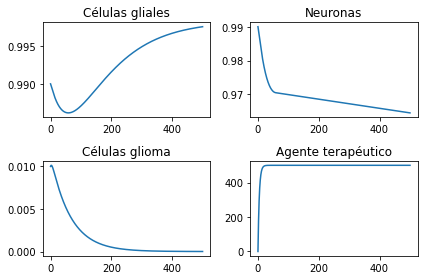

In [10]:
# g(t) concentracion de células gliales -> g
# c(t) concentracion de células cancerosas (glioma) -> c
# n(t) concentracion de neuronas -> n 
# q(t) concentracion de agente terapéutico -> q

dg = lambda x,y,z,r,dx,t: omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x)
dc = lambda x,y,z,r,dx,t: omega2*y*(1-y)-beta2*x*y-p2*y*r/(a2+y)
dn = lambda x,y,z,r,dx,t: alpha*(omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x))*np.heaviside(-(omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x)),1/2)*z-p3*z*r/(a3+z) #np.heaviside(x1,x2) -> x2   if x1 == 0
dq = lambda x,y,z,r,dx,t: phi-zeta*r # zeta = ζ

t,x,y,z,r = runge_kutta_sis(dg,dc,dn,dq,x0,y0,z0,r0,a,b,h)

fig, ax = plt.subplots(2,2)
ax[0,0].plot(t,x); ax[0,0].set_title('Células gliales'); #ax[0,0].grid(color='powderblue')
ax[1,0].plot(t,y); ax[1,0].set_title('Células glioma'); #ax[1,0].grid(color='powderblue')
ax[0,1].plot(t,z); ax[0,1].set_title('Neuronas'); #ax[0,1].grid(color='powderblue')
ax[1,1].plot(t,r); ax[1,1].set_title('Agente terapéutico'); #ax[1,1].grid(color='powderblue')
fig.tight_layout(); plt.show()


# Valores óptimos o críticos agente terapeútico 


In [7]:
h = 0.1 
phi = np.linspace(0,150,151)

In [11]:
df_x0 = pd.DataFrame() #Concentración de células gliales en función de t y phi
df_y0 = pd.DataFrame() #Concentración de células glioma en función de t y phi
df_z0 = pd.DataFrame() #Concentración de neuronas en función de t y phi

for i in phi: 
    dg = lambda x,y,z,r,dx,t: omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x)
    dc = lambda x,y,z,r,dx,t: omega2*y*(1-y)-beta2*x*y-p2*y*r/(a2+y)
    dn = lambda x,y,z,r,dx,t: alpha*(omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x))*np.heaviside(-(omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x)),1/2)*z-p3*z*r/(a3+z) #np.heaviside(x1,x2) -> x2   if x1 == 0
    dq = lambda x,y,z,r,dx,t: i-zeta*r
    
    t,x,y,z,r = runge_kutta_sis(dg,dc,dn,dq,x0,y0,z0,r0,a,b,h) #Resolución sistema ecuaciones por método Runge-Kutta
    
    df_x = pd.DataFrame(x)
    df_x = df_x.transpose()
    df_x1 = pd.concat([df_x0,df_x])
    df_x0 = df_x1
    
    df_y = pd.DataFrame(y)
    df_y = df_y.transpose()
    df_y1 = pd.concat([df_y0,df_y])
    df_y0 = df_y1
    
    df_z = pd.DataFrame(z)
    df_z = df_z.transpose()
    df_z1 = pd.concat([df_z0,df_z])
    df_z0 = df_z1
    
print('¡Cálculos terminados!')


¡Cálculos terminados!


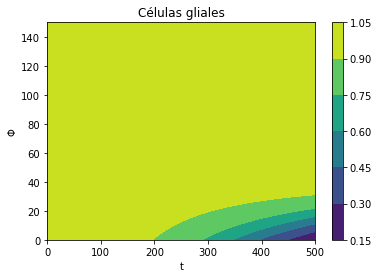

In [12]:
T, PHI = np.meshgrid(t,phi)

fig_g, ax_g = plt.subplots()
g_g = ax_g.contourf(T,PHI,df_x0)
ax_g.set_title('Células gliales'); ax_g.set_xlabel('t'); ax_g.set_ylabel('Φ')
fig_g.colorbar(g_g); plt.show()

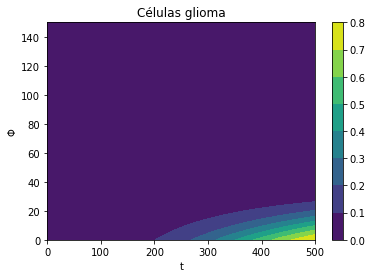

In [13]:
fig_c, ax_c = plt.subplots()
g_c = ax_c.contourf(T,PHI,df_y0)
ax_c.set_title('Células glioma'); ax_c.set_xlabel('t'); ax_c.set_ylabel('Φ')
fig_c.colorbar(g_c); plt.show()

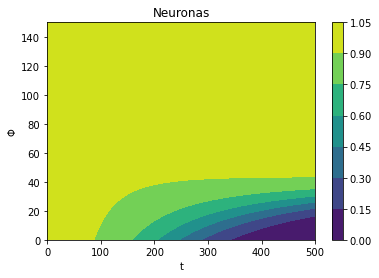

In [14]:
fig_n, ax_n = plt.subplots()
g_n = ax_n.contourf(T,PHI,df_z0)
ax_n.set_title('Neuronas'); ax_n.set_xlabel('t'); ax_n.set_ylabel('Φ')
fig_n.colorbar(g_n); plt.show()

In [8]:
h = 0.1 #paso
phi = np.linspace(0,150,151)
alpha = np.linspace(0,10,21)

filas = len(alpha)
columnas = len(phi)
N = np.zeros([filas, columnas])

for i in range(len(alpha)): 
    for j in range(len(phi)):
        dg = lambda x,y,z,r,dx,t: omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x)
        dc = lambda x,y,z,r,dx,t: omega2*y*(1-y)-beta2*x*y-p2*y*r/(a2+y)
        dn = lambda x,y,z,r,dx,t: j*(omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x))*np.heaviside(-(omega1*x*(1-x)-beta1*x*y-p1*x*r/(a1+x)),1/2)*z-p3*z*r/(a3+z) #np.heaviside(x1,x2) -> x2   if x1 == 0
        dq = lambda x,y,z,r,dx,t: i-zeta*r

        t,x,y,z,r = runge_kutta_sis(dg,dc,dn,dq,x0,y0,z0,r0,a,b,h) #Resolución sistema ecuaciones por método Runge-Kutta

        N[i,j] = z[-1]
        
print('¡Cálculos terminados!')

¡Cálculos terminados!


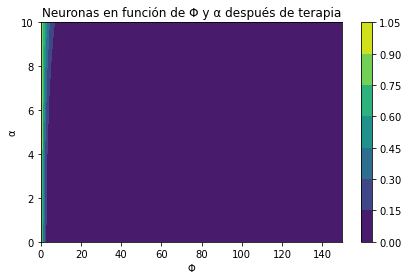

In [9]:
PHI,ALPHA = np.meshgrid(phi,alpha)

fig_N, ax_N = plt.subplots()
g_N = ax_N.contourf(PHI, ALPHA, N)
ax_N.set_title('Neuronas en función de Φ y α después de terapia'); ax_N.set_xlabel('Φ'); ax_N.set_ylabel('α')
fig_N.colorbar(g_N); fig_N.tight_layout(); plt.show()